# Class 4 Lab: K-nearest neighbors and scikit-learn

## Agenda

- **K-nearest neighbors (KNN)**
    - Review of the iris dataset
    - Visualizing the iris dataset
    - KNN classification
    - Review of supervised learning
- **scikit-learn**
    - Requirements for working with data in scikit-learn
    - scikit-learn's 4-step modeling pattern
    - Tuning a KNN model
    - Comparing KNN with other models

## The iris dataset

In [1]:
# read the iris data into a DataFrame
import pandas as pd
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=col_names)

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Terminology

- **150 observations** (n=150): each observation is one iris flower
- **4 features** (p=4): sepal length, sepal width, petal length, and petal width
- **Response**: iris species
- **Classification problem** since response is categorical

![iris](images/iris_petal_sepal.png)

### Let's plot the iris dataset

...and see what we can learn.

In [3]:
# allow plots to appear in the notebook
%matplotlib inline

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


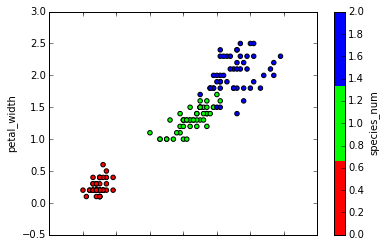

In [4]:
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold)

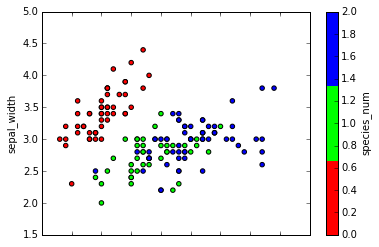

In [6]:
# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

## K-nearest neighbors (KNN) classification

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown iris.

### KNN classification map for iris (K=1)

![1NN classification map](images/iris_01nn_map.png)

### KNN classification map for iris (K=5)

![5NN classification map](images/iris_05nn_map.png)

### KNN classification map for iris (K=15)

![15NN classification map](images/iris_15nn_map.png)

### KNN classification map for iris (K=50)

![50NN classification map](images/iris_50nn_map.png)

**Question:** What's the "best" value for K in this case?

**Answer:** The value which produces the most accurate predictions on unseen data. We want to create a model that generalizes!

## Review of supervised learning

![Supervised learning diagram](images/supervised_learning.png)

## Requirements for working with data in scikit-learn

1. Features and response are **separate objects**
2. Features and response should be entirely **numeric**
3. Features and response should be **NumPy arrays** (or easily convertible to NumPy arrays)
4. Features and response should have **specific shapes** (outlined below)

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [6]:
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [ ]:
# alternative ways to create "X"
#X = iris.drop(['species', 'species_num'], axis=1)
#X = iris.loc[:, 'sepal_length':'petal_width']
#X = iris.iloc[:, 0:4]

In [7]:
# store response vector in "y"
y = iris.species_num

In [8]:
# check X's type
print type(X)
print type(X.values)

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


In [11]:
print X.values

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [9]:
# check y's type
print type(y)
print type(y.values)

<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>


In [13]:
print y.values

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
# check X's shape (n = number of observations, p = number of features)
print X.shape

(150, 4)


In [11]:
# check y's shape (single dimension with length n)
print y.shape

(150,)


## scikit-learn's 4-step modeling pattern

**Step 1:** Import the class you plan to use

In [12]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for "model"
- "Instantiate" means "make an instance of"

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults
- **QUESTION: How do we know what those defaults are? How do we even know what all the parameters are?**

**Step 3:** Fit the model with data 

- Model is "learning" the relationship between X and y in our "training data"
- Process through which learning occurs varies by model
- Subtlety: In general, this is training the model, although "instance-based" models such as KNN don't really have a training step.

In [14]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

- Once a model has been fit with data, it's called a "fitted model"

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Model uses the information it learned during the fitting / training process

In [20]:
knn.predict([3, 5, 4, 2])

array([2])

- Returns a NumPy array, and we keep track of what the numbers "mean"
- Can predict for multiple observations at once

In [16]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([1, 1])

## Tuning a KNN model

In [17]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([1, 1])

In [23]:
# calculate predicted probabilities of class membership
knn.predict_proba(X_new)

array([[ 0. ,  0.8,  0.2],
       [ 0. ,  1. ,  0. ]])

In [18]:
# print distances to nearest neighbors (and their identities)
knn.kneighbors([3, 5, 4, 2])

(array([[ 3.19374388,  3.20312348,  3.24037035,  3.35559235,  3.35559235]]),
 array([[106,  84,  59,  88,  66]]))

## Comparing KNN with other models

Advantages of KNN:

- Simple to understand and explain
- Model fitting is fast
- Can be used for classification and regression!

Disadvantages of KNN:

- Must store all of the training data
- Prediction phase can be slow when n is large
- Sensitive to irrelevant features
- Sensitive to the scale of the data. Feature scaling is important!
- Accuracy is (generally) not competitive with the best supervised learning methods